Buried volume = 44.2%


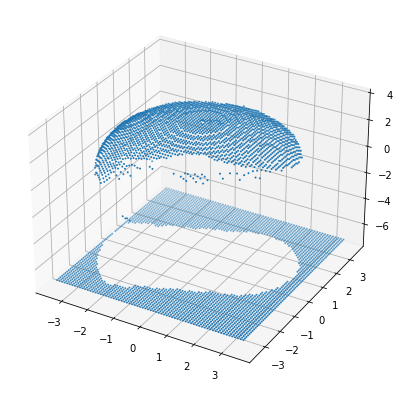

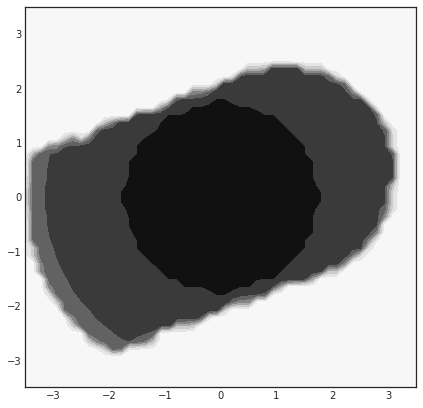

In [3]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from py2sambvca.py2sambvca import py2sambvca as p2s
%matplotlib inline

# Input paths
input_xyz_path = 'xyz_structures//IRMOF-1.xyz'
sambvca_calc_path = 'Sambvca21_source//sambvca21.x'

# Running sambvca.x
buried_vol = p2s(
    xyz_filepath=input_xyz_path,
    sphere_center_atom_ids=[242],
    z_ax_atom_ids=[242, 288],
    xz_plane_atoms_ids=[242, 288, 224],
    path_to_sambvcax=sambvca_calc_path
    )
buried_vol.write_input()
buried_vol.calc()

# Print buried vol result
print(f'Buried volume = {buried_vol.get_buried_vol()}%')


top_surf_data = 'py2sambvca_input-TopSurface.dat'
# top_surf_data = 'IRMOF-1-web-calculated-TopSurface.dat'

X = []
Y = []
Z = []

with open(top_surf_data, 'r') as file:
    for line in file:
        s = list(map(float, line.split()))
        X.append(s[0])
        Y.append(s[1])
        Z.append(s[2])

# 3D scatter plot of top surf points
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d', )
ax.scatter(X, Y, Z, s=1)
plt.show()

def plot_contour(x,y,z,resolution = 50,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z

XX, YY, ZZ = plot_contour(X,Y,Z,resolution = 50,contour_method='linear')

# 2D contour plot of top surf points
with plt.style.context("seaborn-white"):
    fig, ax = plt.subplots(figsize=(7,7))
    ax.contourf(XX,YY,ZZ)